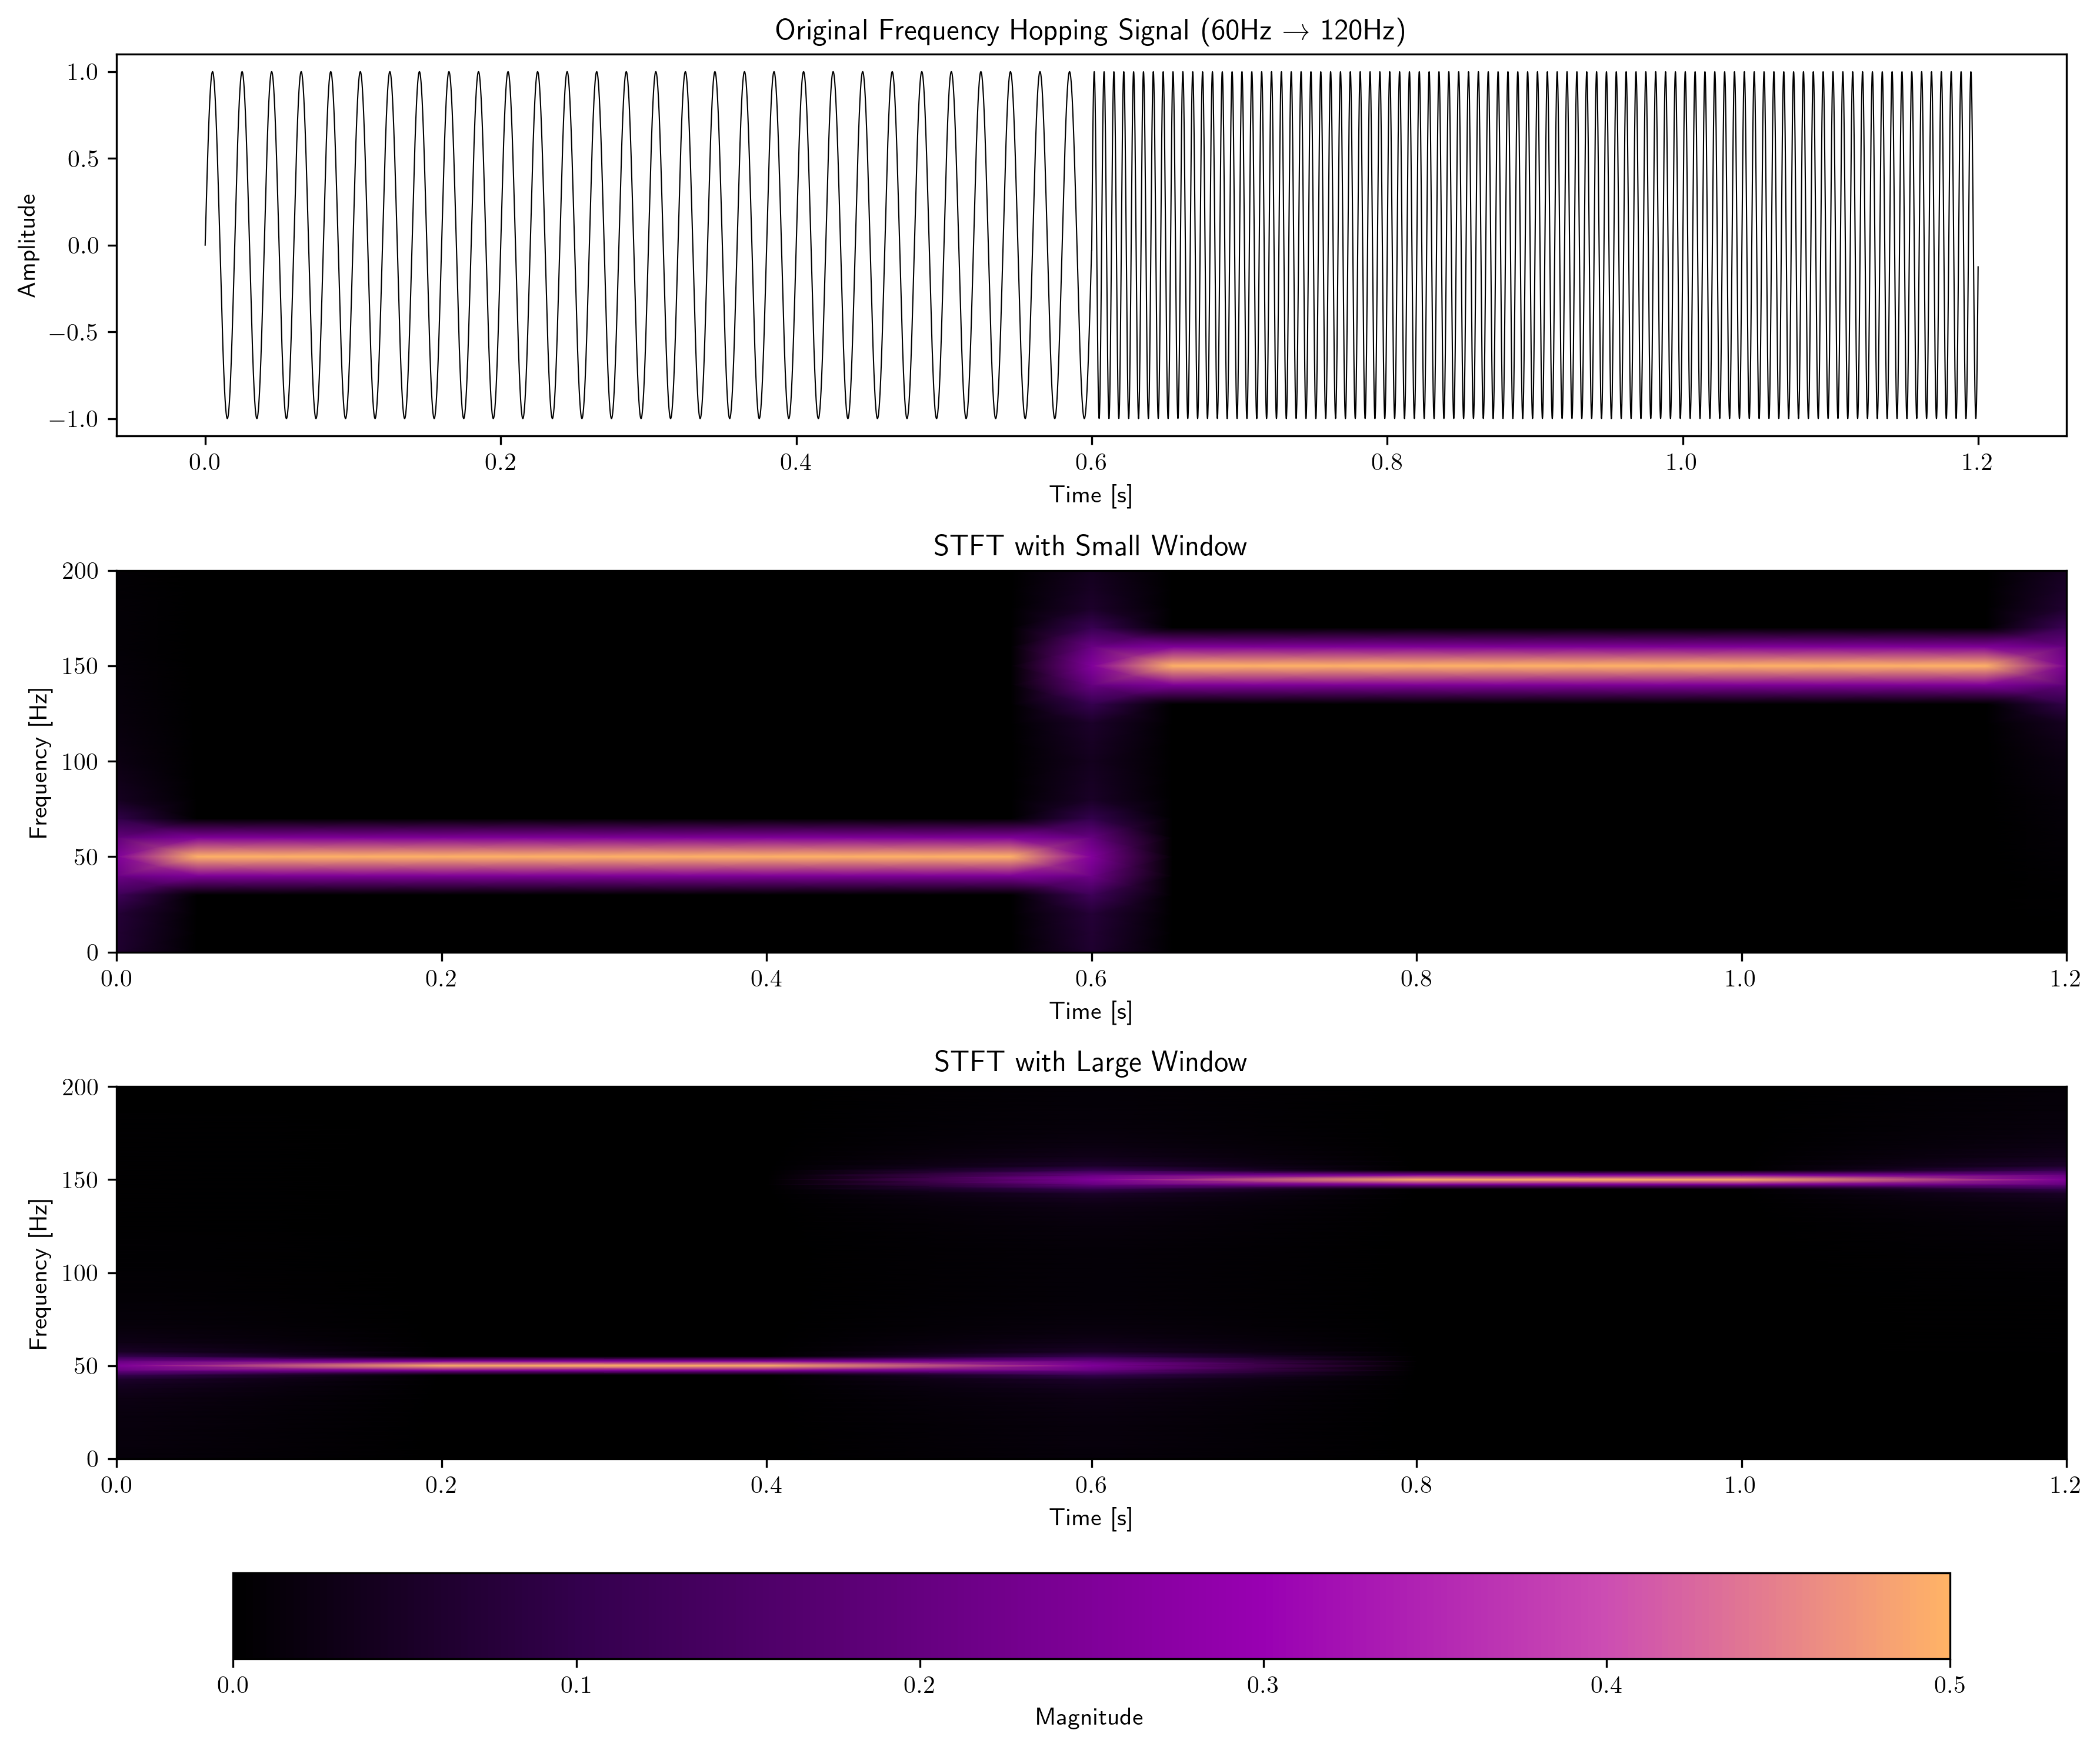

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from matplotlib.colors import LinearSegmentedColormap
plt.rcParams['text.usetex'] = True
# Define a custom colormap
colors = [
    (0.0, 0.0, 0.0),    # Black
    (0.2, 0.0, 0.3),    # Dark Purple
    (0.4, 0.0, 0.5),    # Purple
    (0.6, 0.0, 0.7),    # Bright Purple
    (0.8, 0.3, 0.7),    # Light Purple
    (1.0, 0.7, 0.4)     # Yellow/Orange
]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# ------------------------------
# (1) 첫 번째 그림을 위한 신호 생성 (fs = 10000)
# ------------------------------
fs_signal = 10000  # High sampling rate for first plot
t_signal = np.linspace(0, 1.2, int(1.2 * fs_signal), endpoint=False)

# Time segments for signal generation
t1_signal = t_signal[t_signal < 0.6]
t2_signal = t_signal[t_signal >= 0.6]

# Compute phase for continuity
phi_last_signal = 2 * np.pi * 50 * t1_signal[-1]

# Frequency Hopping Signal with high fs
x1_signal = np.sin(2 * np.pi * 50 * t1_signal)  
x2_signal = np.sin(2 * np.pi * 150 * (t2_signal - t2_signal[0]) + phi_last_signal)
x_signal = np.concatenate([x1_signal, x2_signal])

# ------------------------------
# (2) STFT 분석을 위한 신호 생성 (fs = 500)
# ------------------------------
fs = 500  # Sampling rate for STFT
t = np.linspace(0, 1.2, int(1.2 * fs), endpoint=False)

# Time segments
t1 = t[t < 0.6]  
t2 = t[t >= 0.6]  

# Compute phase at transition
phi_last = 2 * np.pi * 50 * t1[-1]

# Frequency Hopping Signal with fs = 500
x1 = np.sin(2 * np.pi * 50 * t1)
x2 = np.sin(2 * np.pi * 150 * (t2 - t2[0]) + phi_last)
x = np.concatenate([x1, x2])

# Compute STFT
f1, t1_stft, Zxx1 = stft(x, fs, nperseg=50)   # Small window
f2, t2_stft, Zxx2 = stft(x, fs, nperseg=200)  # Large window

# ------------------------------
# (3) 플롯 생성
# ------------------------------
fig, axs = plt.subplots(3, 1, figsize=(12, 10), dpi=300, gridspec_kw={'height_ratios': [1, 1, 1.5]}, tight_layout=True)

# (3-1) Original Signal (fs=10000)
axs[0].plot(t_signal, x_signal, color='k', linewidth=0.5, label="Original Signal")
axs[0].set_title("Original Frequency Hopping Signal (60Hz → 120Hz)")
axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Amplitude")
#axs[0].legend(loc="upper left", bbox_to_anchor=(1, 1))

# (3-2) STFT with Small Window (fs=500)
im1 = axs[1].pcolormesh(t1_stft, f1, np.abs(Zxx1), shading='gouraud', cmap=cmap)
axs[1].set_title("STFT with Small Window")
axs[1].set_xlabel("Time [s]")
axs[1].set_ylabel("Frequency [Hz]")
axs[1].set_ylim(0, 200)

# (3-3) STFT with Large Window (fs=500)
im2 = axs[2].pcolormesh(t2_stft, f2, np.abs(Zxx2), shading='gouraud', cmap=cmap)
axs[2].set_title("STFT with Large Window")
axs[2].set_xlabel("Time [s]")
axs[2].set_ylabel("Frequency [Hz]")
axs[2].set_ylim(0, 200)

# Y축 범위를 동일하게 설정
axs[1].set_ylim(0, 200)
axs[2].set_ylim(0, 200)

# Y축 눈금 맞추기
axs[1].set_yticks(np.linspace(0, 200, num=5))  # 원하는 개수로 조정 가능
axs[2].set_yticks(np.linspace(0, 200, num=5))  # 위와 동일한 틱 적용

# 컬러바 추가
cbar = fig.colorbar(im2, ax=axs[2], orientation='horizontal', pad=0.2)
cbar.set_label('Magnitude')


# Save figure
plt.savefig("./results/STFT_hopping.pdf", dpi=300, bbox_inches='tight')
plt.show()